<a href="https://colab.research.google.com/github/Raqueljrp/Dise-o-Experimental/blob/main/Actividad_1_Rrey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Formato para Trabajar en Colab 2025**
# **Escribe el Nombre del Curso: Estadistica Computarizada - Sesion 1**
## **Escribe tu nombre completo: Raquel Rey**
> Email: rrey@utb.edu.co

> Celular:

> Código Estudiantil: T00057965

# **Librerías Básicas para Diseño de Experimentos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
!pip install bioinfokit &>/dev/null
from bioinfokit.analys import stat
!pip install pingouin &>/dev/null
import pingouin as pg

#  **Problema 1**

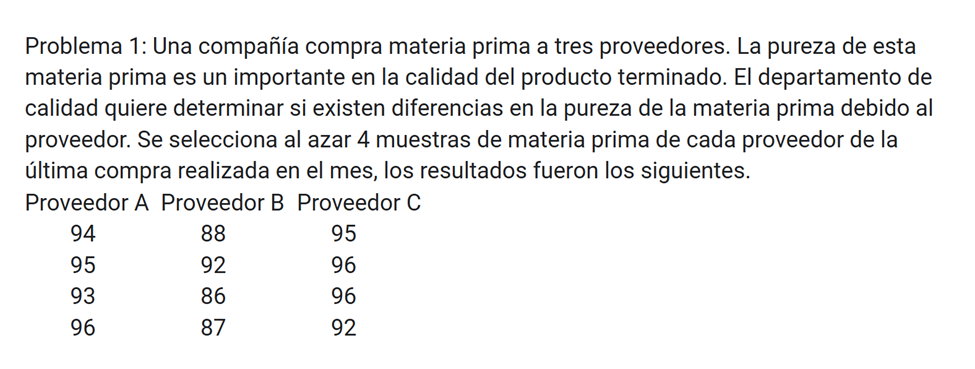



In [ ]:
# @title **4.1 Los Datos del Problema**
PROVEEDOR  =  [ "A" ,  "B" ,  "C"]
Muestras =[94, 95, 93, 96, 88, 92, 86, 87, 95, 96, 96, 92]

In [ ]:
# @title ****4.2 Construyamos el dataFrame Los proveedores y las muestras****

## **4.2 Construyamos el dataFrame de los proveedores y las muestras**
# Los proveedores y las muestras.

DCL = pd.DataFrame({'PROVEEDOR':np.repeat([ "Proveedor A" ,  "Proveedor B" ,  "Proveedor C"], 4), 'PUREZA':Muestras})

In [ ]:
# @title **4.3 Veamos el DataFrame**
DCL

,PROVEEDOR,PUREZA
0,Proveedor A,94
1,Proveedor A,95
2,Proveedor A,93
3,Proveedor A,96
4,Proveedor B,88
5,Proveedor B,92
6,Proveedor B,86
7,Proveedor B,87
8,Proveedor C,95
9,Proveedor C,96


<Axes: title={'center': 'PUREZA Vs PROVEEDOR'}, xlabel='PROVEEDOR', ylabel='PUREZA'>

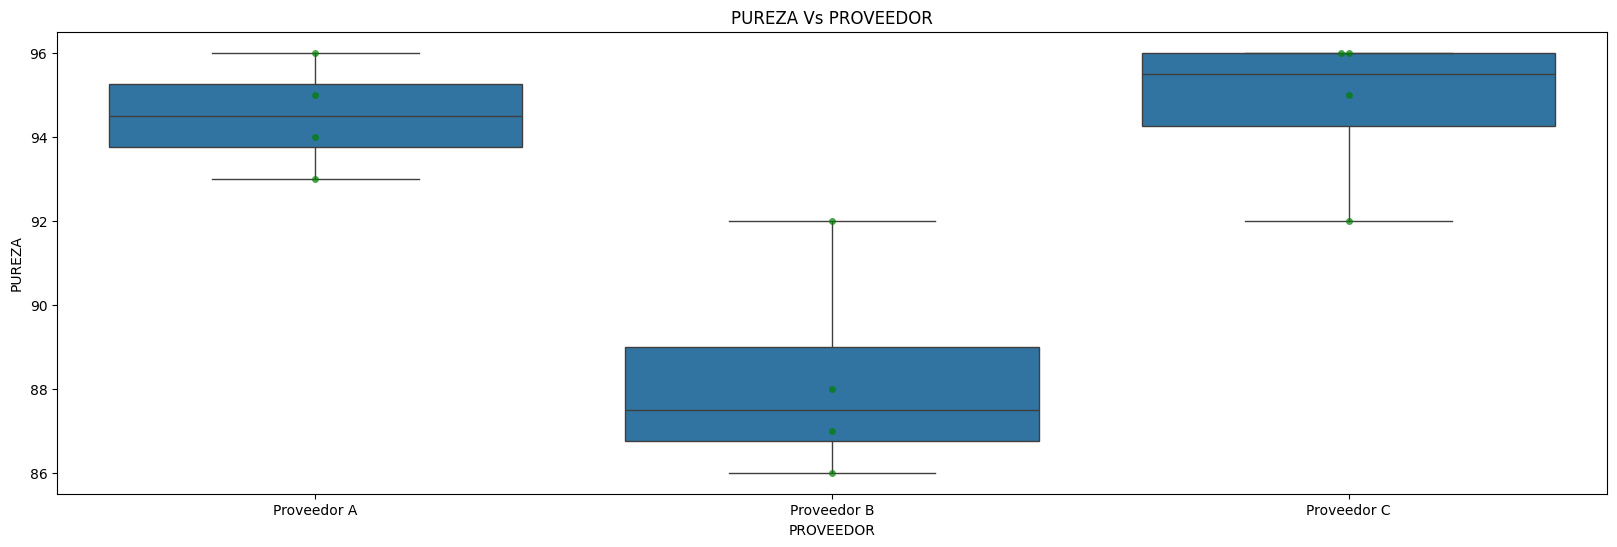

In [ ]:
# @title **4.4 BoxPlot para DCL - Consumo**
fig, axs = plt.subplots(figsize=(20, 6))
axs.set_title('PUREZA Vs PROVEEDOR')
sns.boxplot(x="PROVEEDOR", y="PUREZA", data=DCL, ax=axs)
sns.swarmplot(x="PROVEEDOR", y="PUREZA", data=DCL, color='green',
              alpha = 0.7, ax=axs)

<Axes: title={'center': 'PUREZA Vs PROVEEDOR (Color Cian)'}, xlabel='PROVEEDOR', ylabel='PUREZA'>

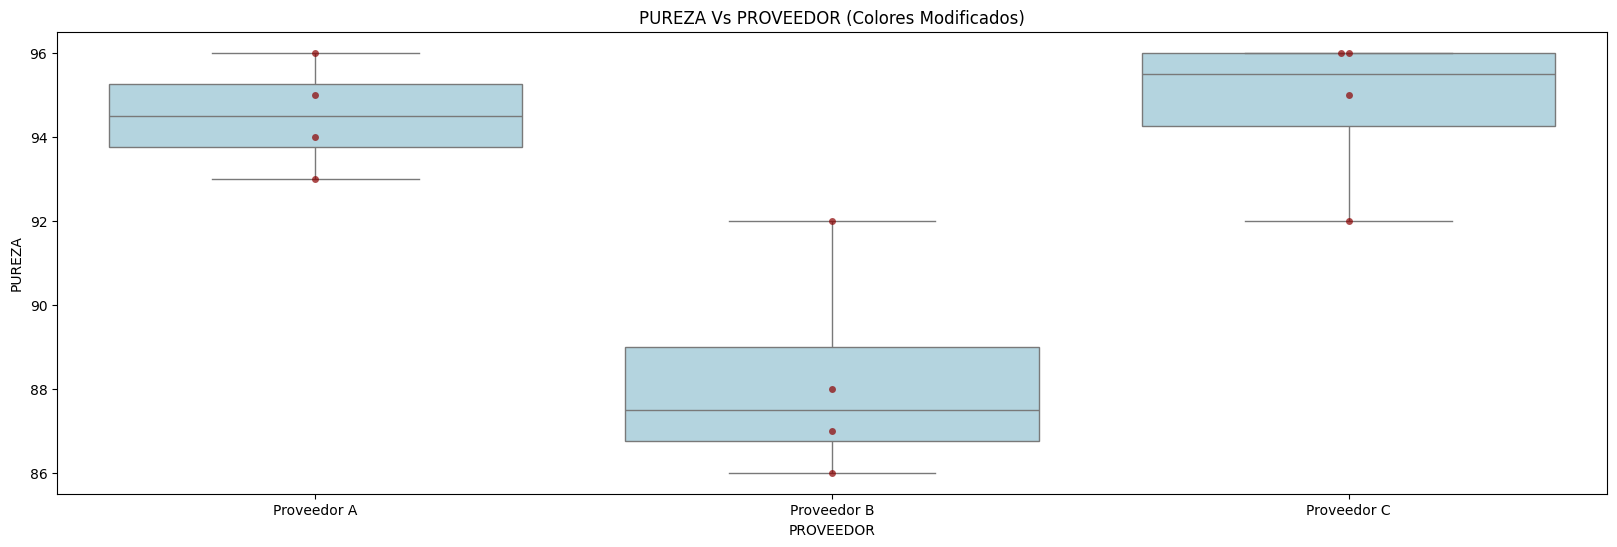

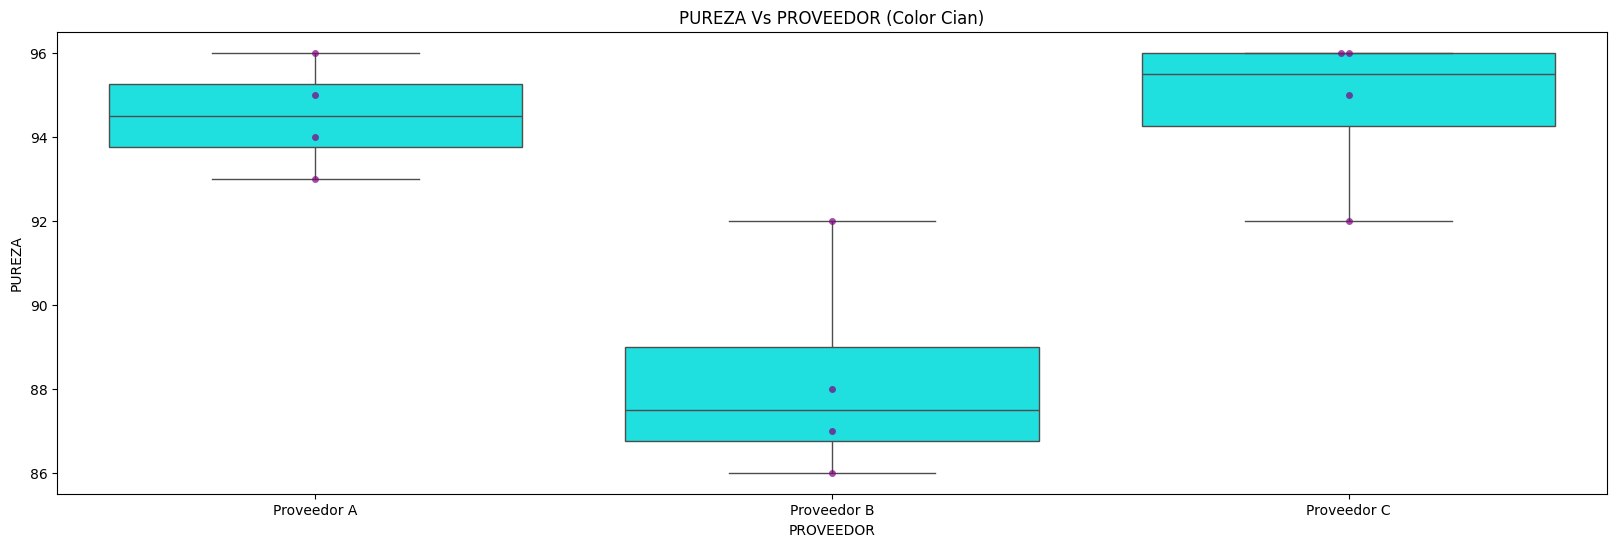

In [ ]:
#prompt:Change the colors to the most recent graph and create an independent one in color cyan

# @title **4.4 BoxPlot para DCL - Consumo con colores modificados**
fig, axs = plt.subplots(figsize=(20, 6))
axs.set_title('PUREZA Vs PROVEEDOR (Colores Modificados)')
sns.boxplot(x="PROVEEDOR", y="PUREZA", data=DCL, ax=axs, color='lightblue')
sns.swarmplot(x="PROVEEDOR", y="PUREZA", data=DCL, color='darkred',
              alpha = 0.7, ax=axs)

# @title **4.4 BoxPlot para DCL - Consumo en color Cian**
fig, axs = plt.subplots(figsize=(20, 6))
axs.set_title('PUREZA Vs PROVEEDOR (Color Cian)')
sns.boxplot(x="PROVEEDOR", y="PUREZA", data=DCL, ax=axs, color='cyan')
sns.swarmplot(x="PROVEEDOR", y="PUREZA", data=DCL, color='purple',
              alpha = 0.7, ax=axs)

In [ ]:
# @title **4.6 Análisis de Varianza Tipo II**
modeloDCL = ols("Muestras ~ PROVEEDOR", data = DCL).fit()
anova_result2 = sm.stats.anova_lm(modeloDCL, typ=1)
print (anova_result2)

            df  sum_sq    mean_sq          F    PR(>F)
PROVEEDOR  2.0   108.5  54.250000  13.376712  0.002014
Residual   9.0    36.5   4.055556        NaN       NaN


In [ ]:
dl_error = modeloDCL.df_resid
print(dl_error)

9.0


In [ ]:
# @title **4.7 Tabla Anova de varianza**
anova_result2

,df,sum_sq,mean_sq,F,PR(>F)
PROVEEDOR,2.0,108.5,54.250000,13.376712,0.002014
Residual,9.0,36.5,4.055556,NaN,NaN


In [ ]:
# @title **4.8 Tabla Anova de varianza**
print(modeloDCL.summary())

                            OLS Regression Results                            
Dep. Variable:               Muestras   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     13.38
Date:                Tue, 26 Aug 2025   Prob (F-statistic):            0.00201
Time:                        10:42:56   Log-Likelihood:                -23.702
No. Observations:                  12   AIC:                             53.40
Df Residuals:                       9   BIC:                             54.86
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## **4.9 Comparaciones Múltiples**
# **Prueba de Diferencias Significativas Múltiples de Tukey** (Tukey's **HSD**)


+ En un diseño en bloques, la **Prueba de Diferencias Significativas Múltiples de Tukey** (Tukey's **HSD**, Honest Significant Difference) se utiliza para comparar medias de tratamientos. La fórmula para el valor de HSD es:

$$
\text{HSD} = Q_{\alpha, k, \text{df}_\text{error}} \cdot \sqrt{\frac{\text{MSE}}{n}}
$$

Donde:

- $Q_{\alpha, k, \text{df}_\text{error}}$ es el valor crítico del **estadístico de rango studentizado** de Tukey para un nivel de significancia $\alpha$, $k$ tratamientos, y $df_{error}$ grados de libertad del error.
- $\text{MSE}$ es el **Error Cuadrático Medio** obtenido del análisis de varianza (ANOVA).
- $n$ es el número de observaciones por tratamiento (es decir, el tamaño de muestra por grupo o nivel del tratamiento).

+ Este valor de HSD se usa para comparar las diferencias entre pares de medias de tratamientos, y si la diferencia entre dos medias es mayor que el valor calculado de HSD, esa diferencia es significativa.

+ En un diseño en bloques, los bloques se consideran en el cálculo del MSE.

In [ ]:
# @title **a. Comparaciones Múltiples:  Vs CATALIZADOR** Calculame el rango studentizado para alpha = 0.05, k =5, N-k = 12**

import scipy.stats as stats

# Parámetros
alpha = 0.05
k = 3  # Número de grupos
df_error =  modeloDCL.df_resid  # Grados de libertad del error (N-k)

# Calcular el valor crítico del rango studentizado
q_critical = stats.studentized_range.ppf(1 - alpha, k, df_error)
HSD = q_critical * np.sqrt(modeloDCL.mse_resid / k)

print(f'Terminos del HSD')
print(f'MSE = {modeloDCL.mse_resid:.2f}')
print(f"El rango studentizado para alpha = {alpha}, k = {k}, df_error = {df_error} es: q_critical = {q_critical:.2f}")
print(f'HSD teorico de la hipotesis principal es HSD = {HSD:.2f}')



Terminos del HSD
MSE = 4.06
El rango studentizado para alpha = 0.05, k = 3, df_error = 9.0 es: q_critical = 3.95
HSD teorico de la hipotesis principal es HSD = 4.59


group1,group2,meandiff,p-adj,lower,upper,reject
Proveedor A,Proveedor B,-6.25,0.0045,-10.2258,-2.2742,True
Proveedor A,Proveedor C,0.25,0.9832,-3.7258,4.2258,False
Proveedor B,Proveedor C,6.5,0.0035,2.5242,10.4758,True


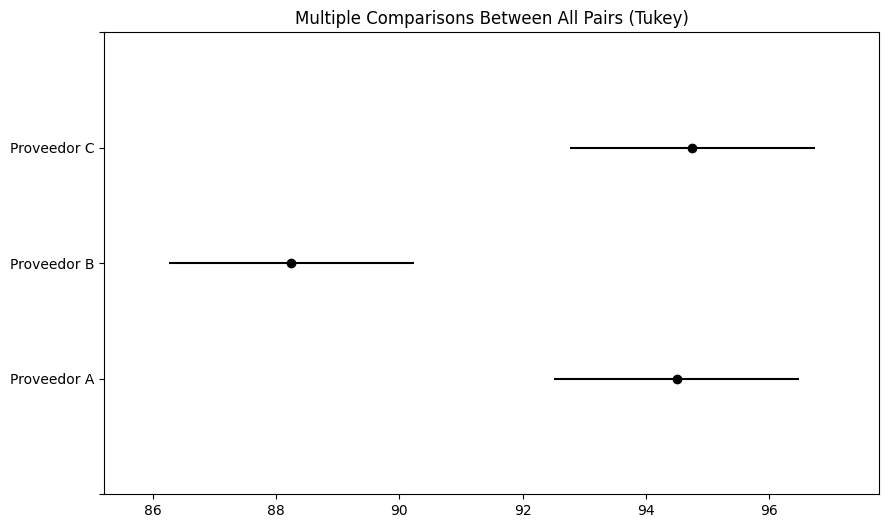

In [ ]:
# @title **b. Comparaciones Múltiples: PUREZA Vs PROVEEDOR**
tukey = pairwise_tukeyhsd(endog=DCL["PUREZA"],     # Data
                          groups=DCL["PROVEEDOR"],   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=200,ymin=-0.5,ymax=14.5, color="red")
tukey.summary()

In [ ]:
# @title **Comparaciones Múltiples: PUREZA Vs PROVEEDOR con alpha = 0.001**
tukey_001 = pairwise_tukeyhsd(endog=DCL["PUREZA"],     # Data
                              groups=DCL["PROVEEDOR"],   # Groups
                              alpha=0.001)          # Significance level

print(tukey_001.summary())

      Multiple Comparison of Means - Tukey HSD, FWER=0.00      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
Proveedor A Proveedor B    -6.25 0.0045 -14.0718  1.5718  False
Proveedor A Proveedor C     0.25 0.9832  -7.5718  8.0718  False
Proveedor B Proveedor C      6.5 0.0035  -1.3218 14.3218  False
---------------------------------------------------------------


## **b. Mínima Diferencia Significativa (LSD)**

+ Para realizar la prueba de **Mínima Diferencia Significativa (LSD)** en lugar de Tukey HSD, necesitamos hacer algunos ajustes. La **LSD** se basa en la distribución t de Student, en lugar del rango studentizado de Tukey. Los pasos para calcular la LSD son:

### **Fórmula para LSD**

$$
\text{LSD} = t_{\alpha/2, \text{df}_\text{error}} \cdot \sqrt{2 \cdot \frac{\text{MSE}}{n}}
$$

Donde:
- $ t_{\alpha/2, \text{df}_\text{error}}$ es el valor crítico de la distribución t de Student para un nivel de significancia $\alpha$ y $\text{df}_\text{error}$ grados de libertad del error.
- $\text{MSE}$ es el Error Cuadrático Medio (Mean Squared Error).
- $n$ es el número de observaciones por grupo (CATALIZADOR).
`

### **Explicación del Código:**
1. **t_critical**: Se calcula el valor crítico de la distribución t usando `stats.t.ppf` con un nivel de significancia \(\alpha/2\) y los grados de libertad del error.
2. **mse**: Se extrae el error cuadrático medio del modelo.
3. **n**: El número de observaciones por grupo se calcula promediando el tamaño de muestra por grupo (CATALIZADOR).
4. **lsd**: Se utiliza la fórmula de LSD para obtener el valor.
5. **Prueba de Tukey**: La prueba de Tukey se realiza solo como referencia, ya que en este caso se está calculando la LSD.

+ Esto te permitirá evaluar la **mínima diferencia significativa** entre los grupos de catalizadores en términos de **Tiempo**.



In [ ]:
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Parámetros
alpha = 0.05
k = 3  # Número de grupos (CATALIZADOR)
N = len(DCL)  # Número total de observaciones
df_error = modeloDCL.df_resid  # Grados de libertad del error (N-k)

# Obtener el valor crítico t para la prueba LSD
t_critical = stats.t.ppf(1 - alpha / 2, df_error)

# Obtener el MSE del modelo
mse = modeloDCL.mse_resid

# Calcular el tamaño de muestra promedio por grupo
n = DCL.groupby('PROVEEDOR')['PUREZA'].count().mean()

# Calcular la LSD
LSD = t_critical * np.sqrt(2 * mse / n)

print(f'Términos de la LSD')
print(f'el valor de n = {n}')
print(f'MSE = {mse:.2f}')
print(f"El valor crítico t para alpha = {alpha/2}, df_error = {df_error} es: t_critical = {t_critical:.2f}")
print(f'LSD teórico para la hipótesis principal es LSD = {LSD:.2f}')

# Opcional: Resumen de los resultados usando Tukey para comparación con LSD
#tukey = pairwise_tukeyhsd(endog=DCL["PUREZA"], groups=DCL["PROVEEDOR"], alpha=alpha)
#tukey.plot_simultaneous()
#print(tukey.summary())


Términos de la LSD
el valor de n = 4.0
MSE = 4.06
El valor crítico t para alpha = 0.025, df_error = 9.0 es: t_critical = 2.26
LSD teórico para la hipótesis principal es LSD = 3.22


In [ ]:
# @title **c. Según los resultados de la prueba HSD con 99,9% de confianza, ¿Qué catalizadores minimizan el tiempo de reacción de un proceso químico?**

import scipy.stats as stats

# Parámetros
alpha = 0.0001
k = 3  # Número de grupos
df_error = 12  # Grados de libertad del error (N-k)

# Calcular el valor crítico del rango studentizado
q_critical = stats.studentized_range.ppf(1 - alpha, k, df_error)
HSD = q_critical * np.sqrt(modeloDCL.mse_resid / k)

print(f'Terminos del HSD')
print(f'MSE = {modeloDCL.mse_resid:.2f}')
print(f"El rango studentizado para alpha = {alpha}, k = {k}, N-k = {df_error} es: q_critical = {q_critical:.2f}")
print(f'HSD teorico de la hipotesis principal es HSD = {HSD:.2f}')



Terminos del HSD
MSE = 4.06
El rango studentizado para alpha = 0.0001, k = 3, N-k = 12 es: q_critical = 8.99
HSD teorico de la hipotesis principal es HSD = 10.45


In [ ]:
### **c. Descriptores numéricos para 'PROMEDIO vs PROGRAMA vs SEXO'**
print('PUREZA vs PROVEEDOR')
DCL.groupby('PROVEEDOR')['PUREZA'].agg(['count', 'mean', 'std', 'median'])


PUREZA vs PROVEEDOR


,count,mean,std,median
PROVEEDOR,,,,
Proveedor A,4,94.50,1.290994,94.5
Proveedor B,4,88.25,2.629956,87.5
Proveedor C,4,94.75,1.892969,95.5


In [ ]:
DCL2 = DCL.groupby('PROVEEDOR')['PUREZA'].agg(['count', 'mean', 'std', 'median'])
DCL2['HSD'] = HSD
DCL2['LSD'] = LSD
DCL2

,count,mean,std,median,HSD,LSD
PROVEEDOR,,,,,,
Proveedor A,4,94.50,1.290994,94.5,10.44774,3.221313
Proveedor B,4,88.25,2.629956,87.5,10.44774,3.221313
Proveedor C,4,94.75,1.892969,95.5,10.44774,3.221313


In [ ]:
DCL2['HSD :IC(μ) - 95%'] = DCL2.apply(lambda row: (round(row['mean'] - HSD, 2), round(row['mean'] + HSD, 2)), axis=1)
DCL2['LSD :IC(μ) - 95%'] = DCL2.apply(lambda row: (round(row['mean'] - LSD, 2), round(row['mean'] + LSD, 2)), axis=1)

DCL2


,count,mean,std,median,HSD,LSD,HSD :IC(μ) - 95%,LSD :IC(μ) - 95%
PROVEEDOR,,,,,,,,
Proveedor A,4,94.50,1.290994,94.5,10.44774,3.221313,"(84.05, 104.95)","(91.28, 97.72)"
Proveedor B,4,88.25,2.629956,87.5,10.44774,3.221313,"(77.8, 98.7)","(85.03, 91.47)"
Proveedor C,4,94.75,1.892969,95.5,10.44774,3.221313,"(84.3, 105.2)","(91.53, 97.97)"


### **c. Comparaciones Múltiples: DCL - Dia - Usando Pytho y Statgraphics**

## **4.10 Supuestos del Modelo**
# **a. Forma 1. Shapiro Wilks**

In [ ]:
# **a. Forma 1. Shapiro Wilks**
statistic, pvalue = stats.shapiro(modeloDCL.resid)
print(f'El valor critico Shapiro wilks es {round(statistic,3)} y el valor p = {round(pvalue,1)*100} > 5%')

El valor critico Shapiro wilks es 0.972 y el valor p = 90.0 > 5%


# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

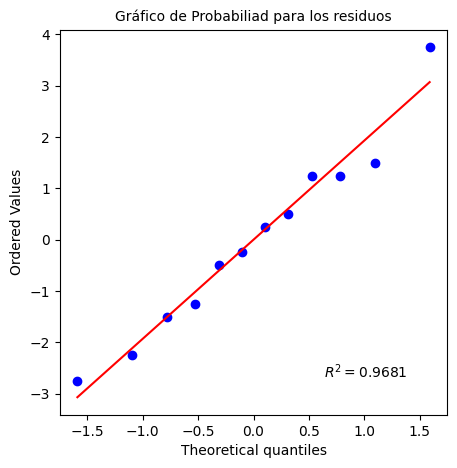

In [ ]:
# **b. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**
fig = plt.figure(figsize= (5, 5))
ax = fig.add_subplot(111)
normality_plot, stat = stats.probplot(modeloDCL.resid, plot= plt, rvalue= True)
ax.set_title("Gráfico de Probabiliad para los residuos", fontsize= 10)
ax.set

plt.show()

# **c. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma**

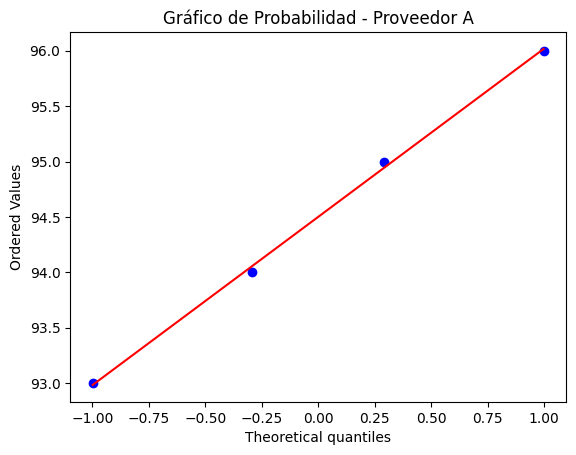

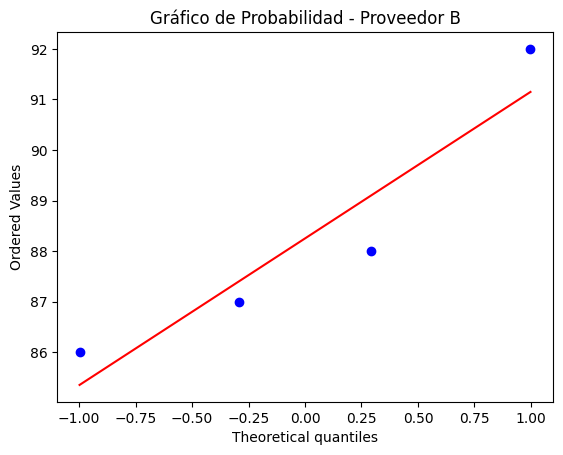

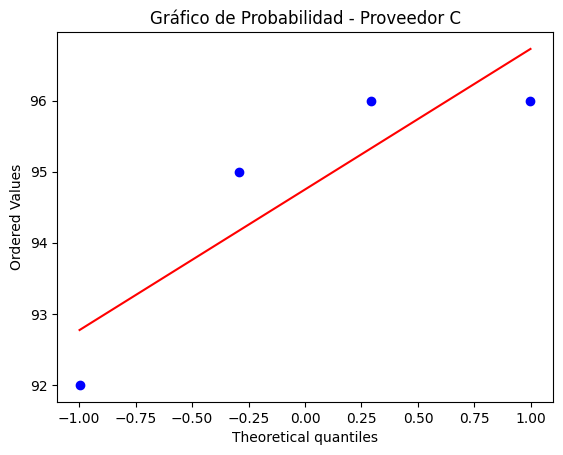

In [ ]:
# **c. Prueba gráfica con el gráfico de probabilidad Normal y el Histograma: Por VITAMINAS**

unique_vitaminas = DCL['PROVEEDOR'].unique()
for vitamina in unique_vitaminas:
    stats.probplot(DCL[DCL['PROVEEDOR'] == vitamina]['PUREZA'], dist="norm", plot=plt)
    plt.title("Gráfico de Probabilidad - "+vitamina)
    plt.show()